#호텔 예약 데이터 분석

이 노트북은 호텔 예약 데이터를 사용하여 다양한 측면을 탐색적 데이터 분석(EDA)하고 주요 특징 및 관계를 파악하는 것을 목표로 합니다.

## 1. 데이터 로딩 및 전처리

이 섹션에서는 분석에 필요한 데이터를 불러오고, 전처리 과정을 수행합니다.

### 1.1 Google Drive 마운트

### 1.2 한글 폰트 설정

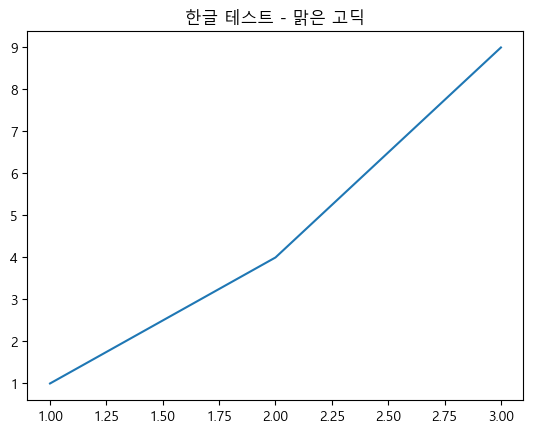

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows 기본)
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

plt.plot([1,2,3],[1,4,9])
plt.title("한글 테스트 - 맑은 고딕")
plt.show()


In [ ]:
!pip install plotly
import plotly.express as px

Defaulting to user installation because normal site-packages is not writeable


### 1.3 데이터 로딩 및 초기 필터링

In [ ]:
import pandas as pd

# 같은 경로에 있는 CSV 파일 로드
file_path = 'hotel_booking.csv'
df = pd.read_csv(file_path)


### 1.4 파생변수 생성

In [ ]:
import pandas as pd

# 1. yyyy-mm-dd 형태의 날짜 데이터 생성
# 월 이름을 숫자로 변환하기 위한 매핑 딕셔너리
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['arrival_date_month_num'] = df['arrival_date_month'].map(month_mapping)

# 날짜 문자열 생성 (월이 한 자릿수일 경우 앞에 0을 붙여야 함)
df['arrival_date'] = df['arrival_date_year'].astype(str) + '-' + \
                     df['arrival_date_month_num'].astype(str).str.zfill(2) + '-' + \
                     df['arrival_date_day_of_month'].astype(str).str.zfill(2)

# 날짜 형식으로 변환
df['arrival_date'] = pd.to_datetime(df['arrival_date'], errors='coerce')

# 임시로 만든 월 숫자 열 삭제
df = df.drop(columns=['arrival_date_month_num'])

# 2. total_guests 생성
df['total_guests'] = df['adults'] + df['children'] + df['babies']

# 3. is_family 생성
# adults가 1 이상이고 (children > 0 또는 babies > 0) 인 경우 가족으로 판단
df['is_family'] = ((df['adults'] > 0) & ((df['children'] > 0) | (df['babies'] > 0)))

# 원본 날짜 관련 열 삭제
df = df.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month'])


print("파생변수 생성 후 데이터프레임의 상위 5개 행 (추가된 열 확인):")
display(df[['arrival_date', 'total_guests', 'is_family']].head())

print("\n파생변수 생성 완료.")

파생변수 생성 후 데이터프레임의 상위 5개 행 (추가된 열 확인):


,arrival_date,total_guests,is_family
0,2015-07-01,2.0,False
1,2015-07-01,2.0,False
2,2015-07-01,1.0,False
3,2015-07-01,1.0,False
4,2015-07-01,2.0,False



파생변수 생성 완료.


### 1.5 데이터 기본 정보 및 기술 통계 확인

In [ ]:
# 데이터프레임의 기술 통계 확인 (숫자형 열)
print("데이터프레임의 기술 통계:")
display(df.describe())

# 데이터프레임의 정보 확인 (열 정보, 데이터 타입, 결측치 등)
print("\n데이터프레임 정보:")
df.info()

데이터프레임의 기술 통계:


,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_date,total_guests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390,119386.000000
mean,0.370416,104.011416,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016-08-28 16:39:45.727447808,1.968229
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2015-07-01 00:00:00,0.000000
25%,0.000000,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-03-13 00:00:00,2.000000
50%,0.000000,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-09-06 00:00:00,2.000000
75%,1.000000,160.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-03-18 00:00:00,2.000000
max,1.000000,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-08-31 00:00:00,55.000000
std,0.482918,106.863097,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN,0.722400



데이터프레임 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   stays_in_weekend_nights         119390 non-null  int64         
 4   stays_in_week_nights            119390 non-null  int64         
 5   adults                          119390 non-null  int64         
 6   children                        119386 non-null  float64       
 7   babies                          119390 non-null  int64         
 8   meal                            119390 non-null  object        
 9   country                         118902 non-null  object        
 10  market_segment                  119390 non-n